In [1]:
%matplotlib notebook
import lightkurve as lk

# Introduction to lightkurve - plotting multiple sectors of data

This notebook covers how plot data from multiple TESS sector and how to normalize the data fro a single or multiple sectors.

Notes:

- You need to run each cell. Do this by either pressing the 'run' button at the top of the page or pressing shift+enter (this is what Nora does in the videos). 

- When you runa cell, a star will appear in the brackets to the left of the cell while the cell is runnning. Once it has successfully completed running the code the star will turn into a number (often it runs so fast that you don't see the star).

- Text following a # is ignored by the code, so all comments are shown following # (except in this cell because I made this into a text cell)


In [2]:
TIC = 'TIC 284475976' # !! CHANGE THIS for a different target

'''
(this is a comment and not code - for longer comments you can use tripple quotation marks)

note, there are a number of ways to select what sectors you want to look at. First check what sectors are available using:

print (lk.search_lightcurve(TIC, author = 'SPOC'))

this will print the available sectors for a given target for you. You can then select them using: 

1. a range of sectors using'[start, end]': 'lk.search_lightcurve(TIC, author = 'SPOC')[0:9]'
2. listing the sectors you want: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = [5,6,8]'). (the square brackets are important!)
3. a single sector: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = 5')
4. the first available secor: 'lk.search_lightcurve(TIC, author = 'SPOC')[0]'
5. all of the available data: 'lk.search_lightcurve(TIC, author = 'SPOC')'
'''

# search what SPOC data is available for a given target - and chose a sector
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 23) # !! CHANEG THIS (see above)

# we'll come back to using this 'lc' downloaded data lower down in the notebook!
lc = sector_data.download()


<IPython.core.display.Javascript object>


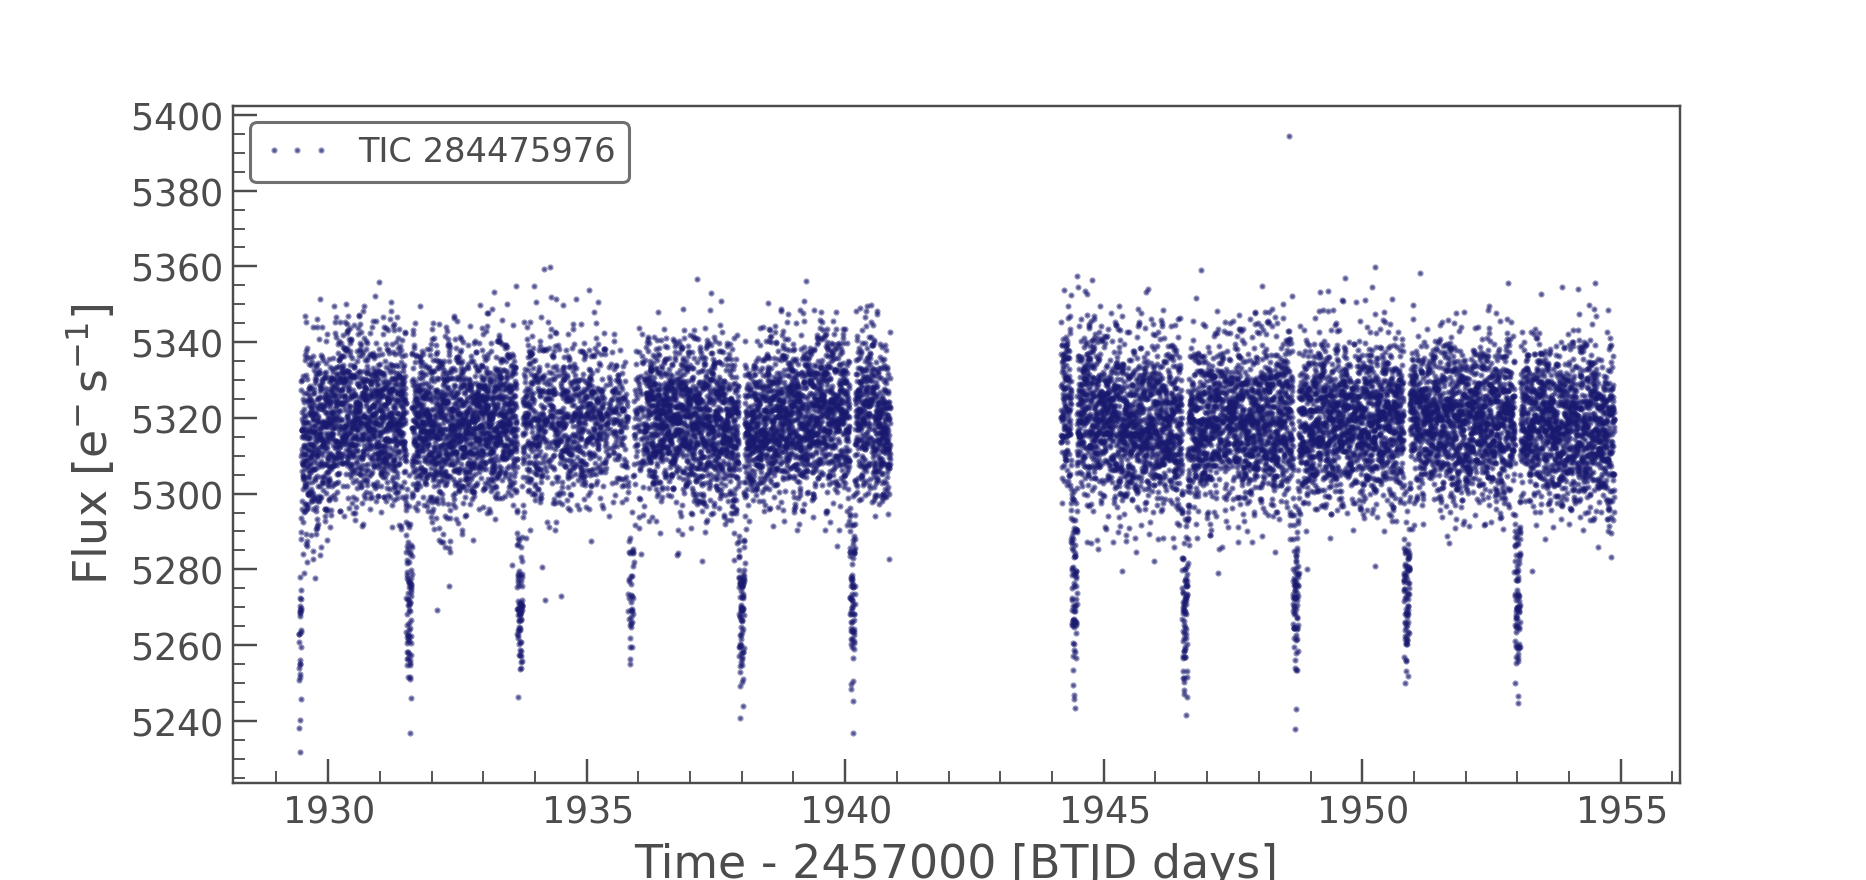

In [3]:
lc.plot(linewidth = 0, marker = '.', color = 'midnightblue', alpha = 0.5)

In [4]:
# define a new TIC ID 
# lets give it a different name (add _2)
TIC_2 = 'TIC 55525572'

In [5]:
# check the avauilable data for this target
available_data_all = lk.search_lightcurve(TIC_2, author = 'SPOC')

In [6]:
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,55525572,0.0
1,TESS Sector 05,2018,SPOC,120,55525572,0.0
2,TESS Sector 08,2019,SPOC,120,55525572,0.0
3,TESS Sector 09,2019,SPOC,120,55525572,0.0
4,TESS Sector 10,2019,SPOC,120,55525572,0.0
5,TESS Sector 11,2019,SPOC,120,55525572,0.0
6,TESS Sector 12,2019,SPOC,120,55525572,0.0
7,TESS Sector 13,2019,SPOC,120,55525572,0.0
8,TESS Sector 27,2020,SPOC,20,55525572,0.0


In [7]:
# select just a couple of sectors - there are two wats of doing this, either select the top couple of rows 
# you can do this using [start:finish] e.g.: 
select_sectors = available_data_all[0:4]

# or alternatively you can explicitly state which sectors you want to look at my listing them in square brackets like this: 
select_sectors = lk.search_lightcurve(TIC_2, author = 'SPOC', sector = [4,5,6,8])

In [8]:
# download multiple sectors (note that this command is slightly different than when we downalod data for one sector)
lc_collection = select_sectors.download_all()

<IPython.core.display.Javascript object>


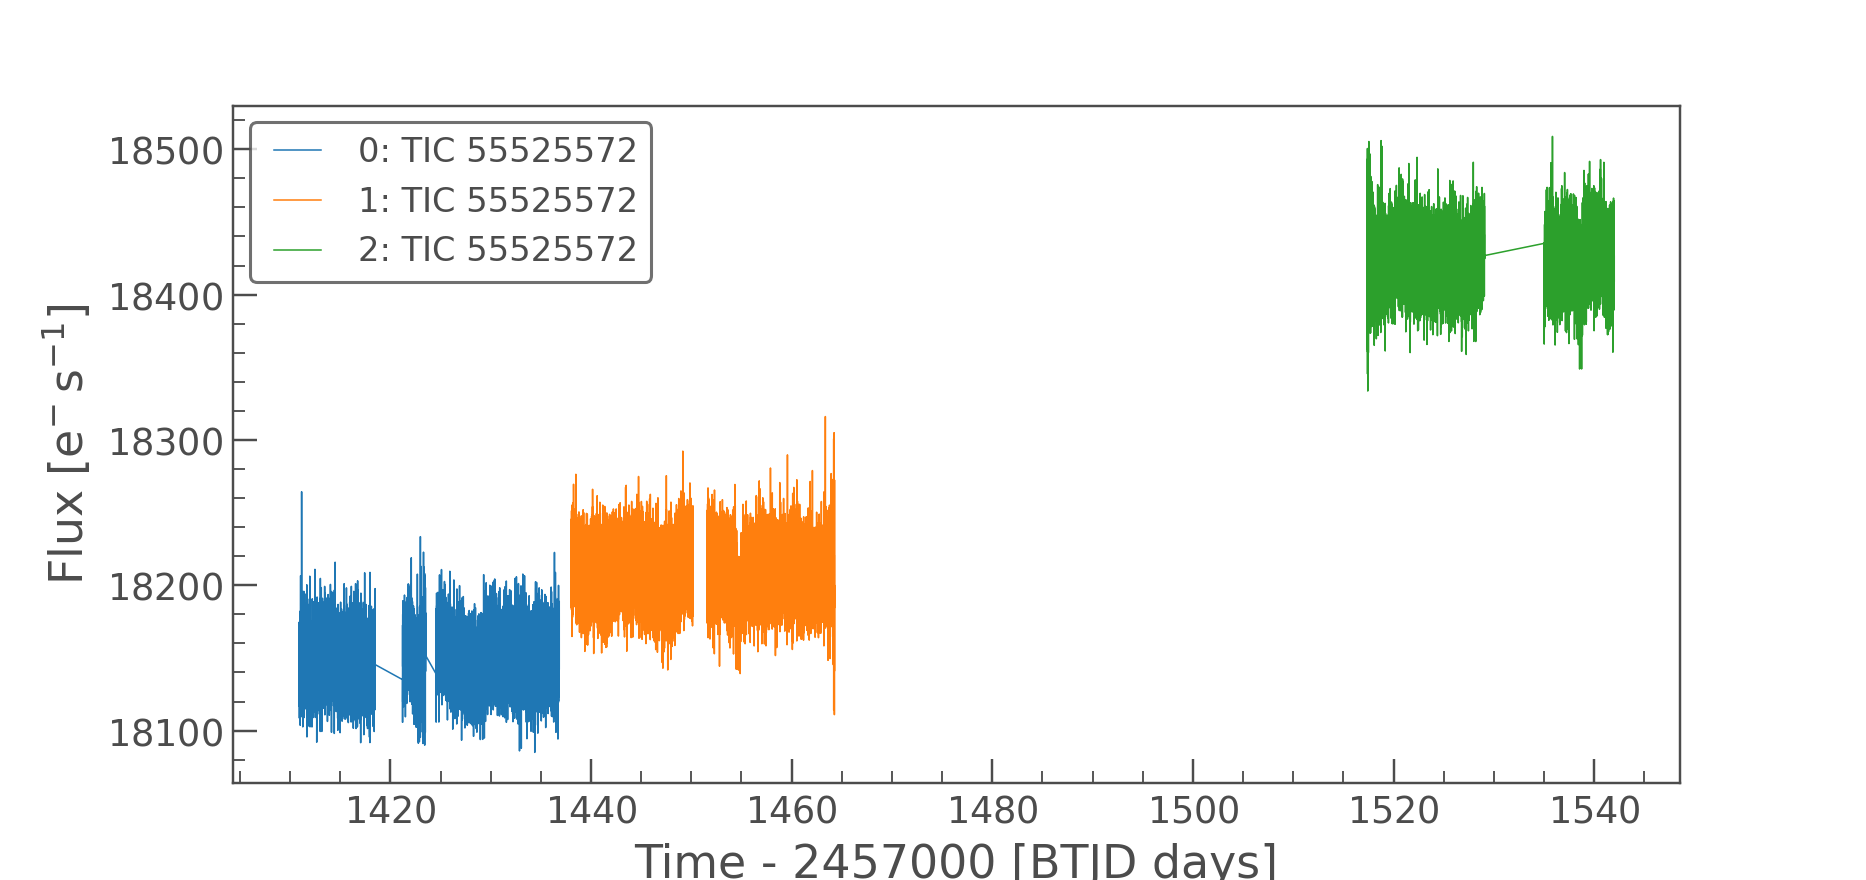

In [9]:
lc_collection.plot()

In [10]:
# stitch the different sectors together, this '.stitch()' function also normalized the data for us
lc_collection_stitched = lc_collection.stitch()

<IPython.core.display.Javascript object>


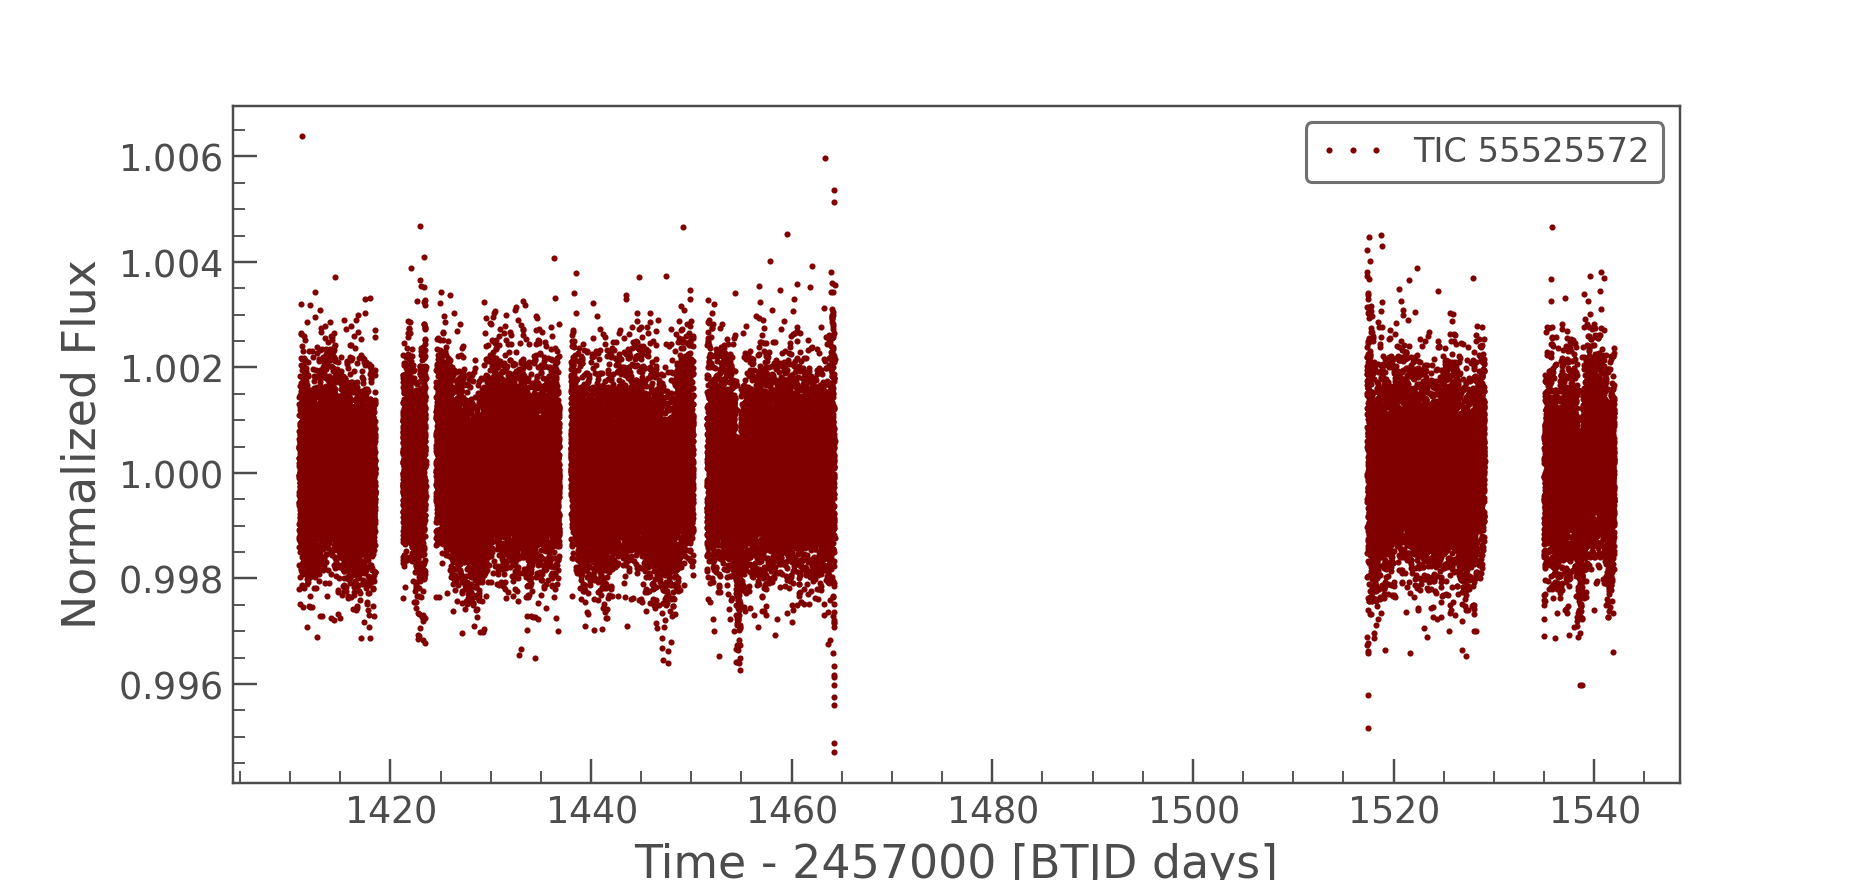

In [11]:
lc_collection_stitched.plot(color = 'maroon', lw = 0, marker = '.')

Let's now look at how to normalize TESS data if we are only looking at one sector and not multiple sectors!

In [12]:
# reuse the 'lc' that we define at the start of this notebook
# use .normalize() to normalise the data
lc_noramlize = lc.normalize()

<IPython.core.display.Javascript object>


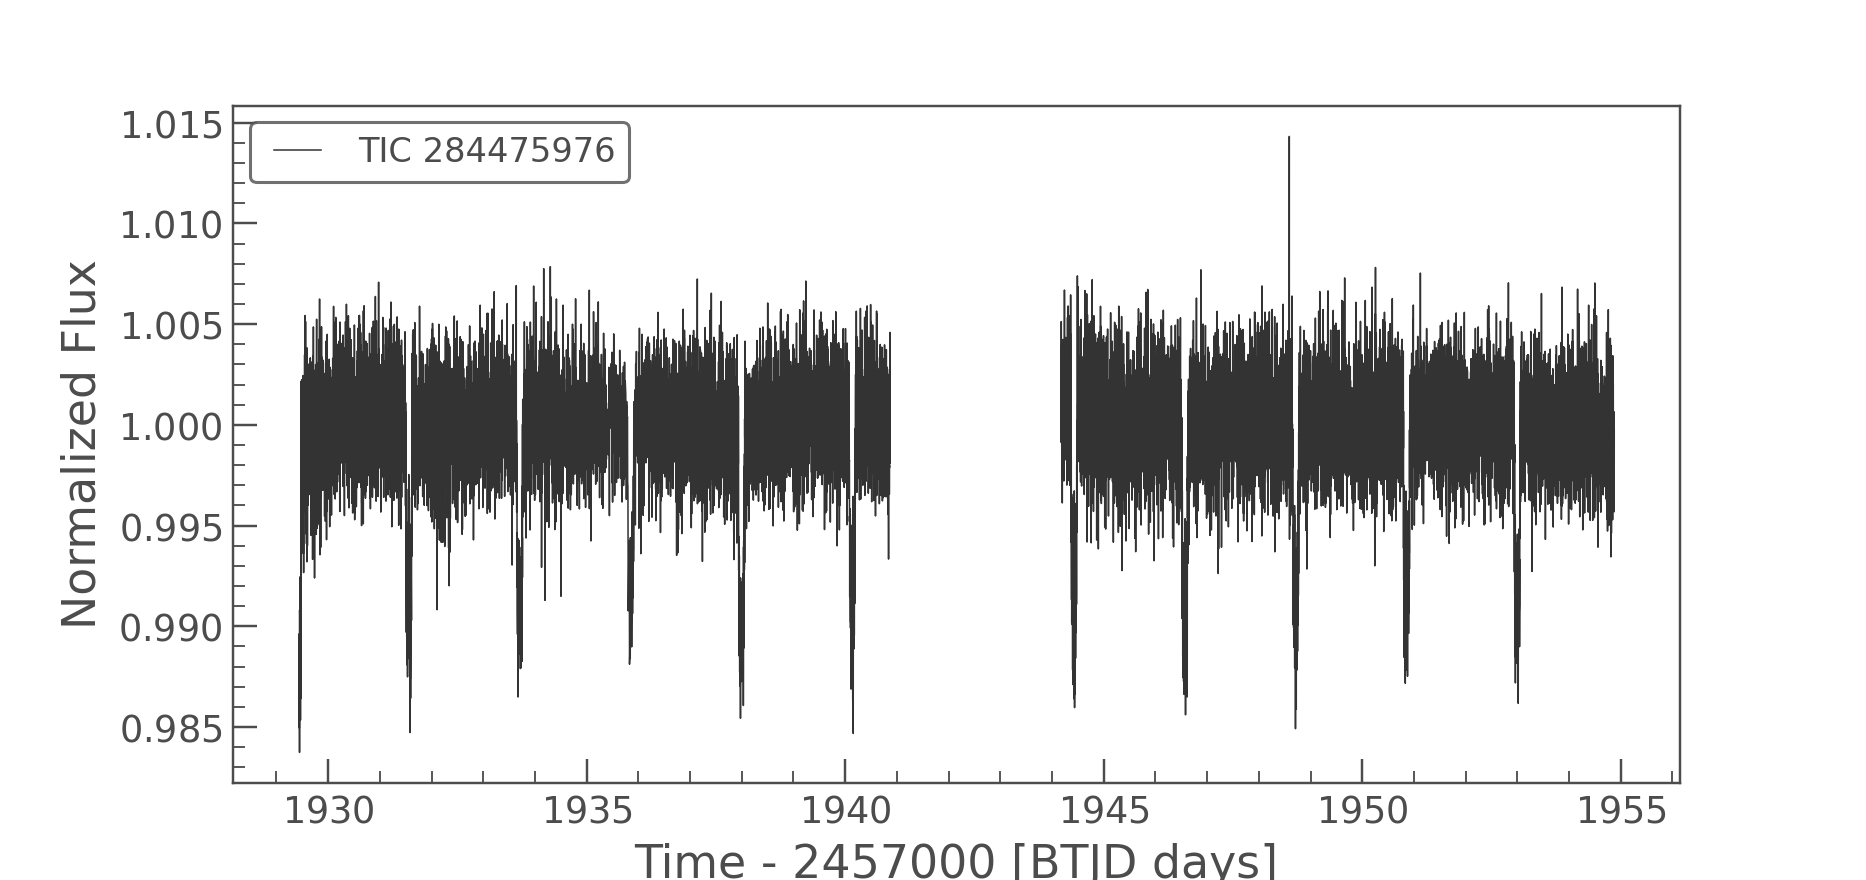

In [13]:
lc_noramlize.plot()

<IPython.core.display.Javascript object>


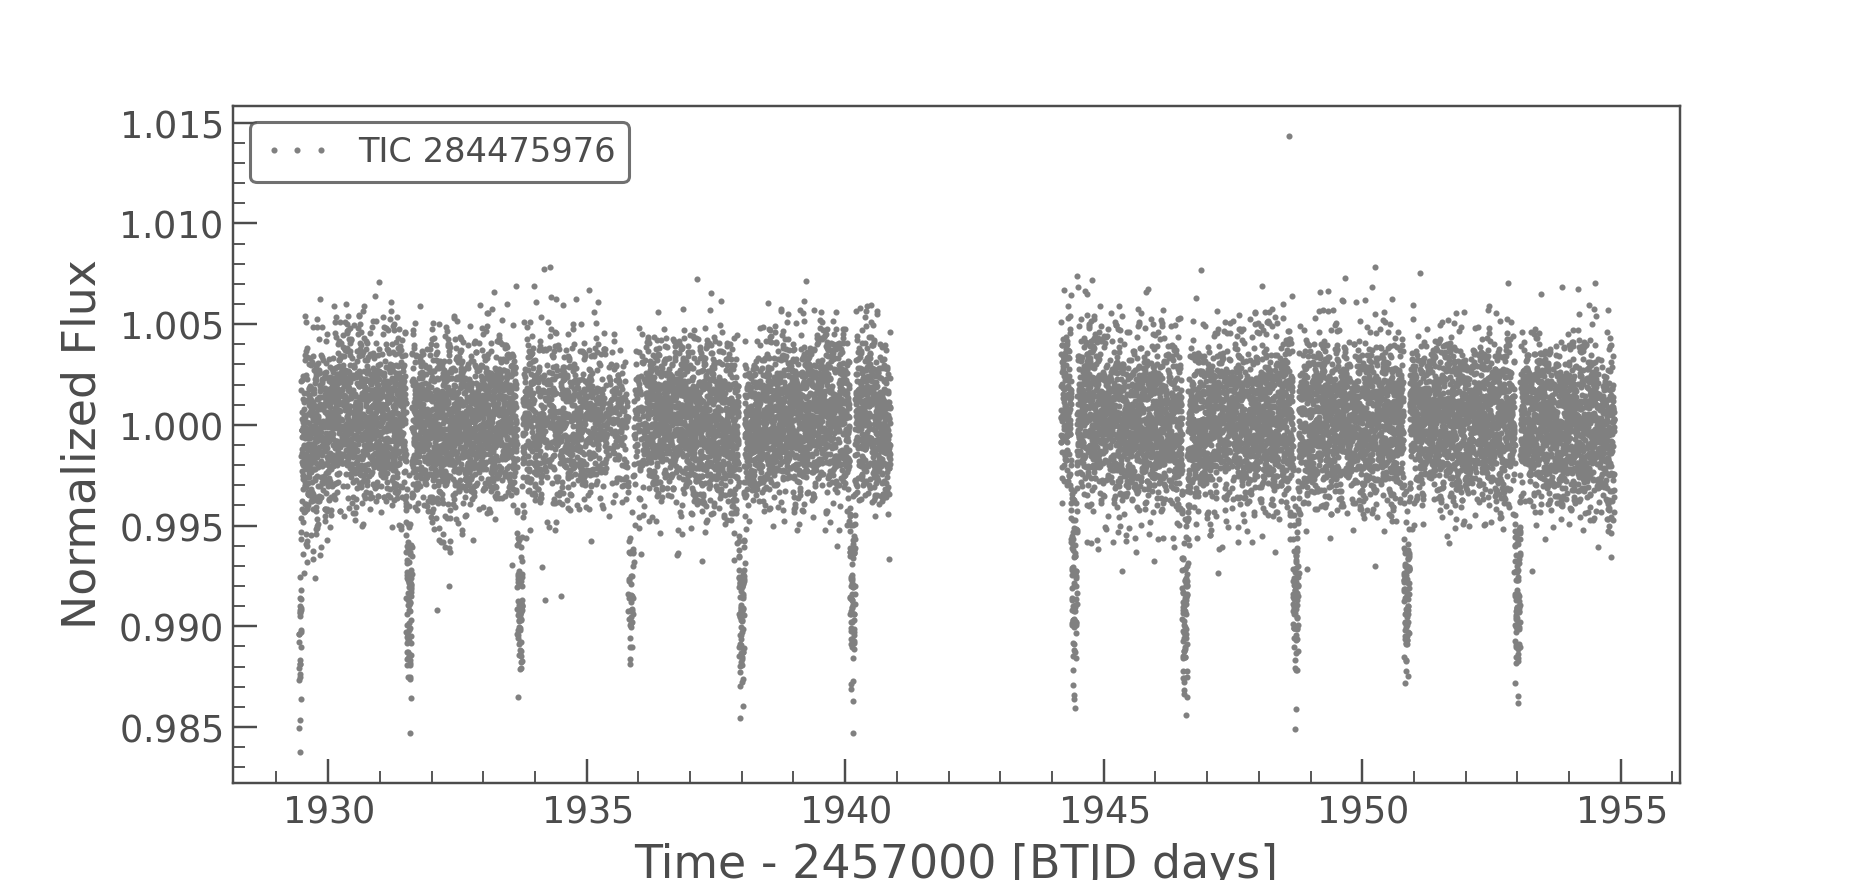

In [14]:
# you can also do this in one line of code as opposed to multiple. For example:

lc.normalize().plot(marker = '.', linewidth = 0, color = 'grey')

<IPython.core.display.Javascript object>


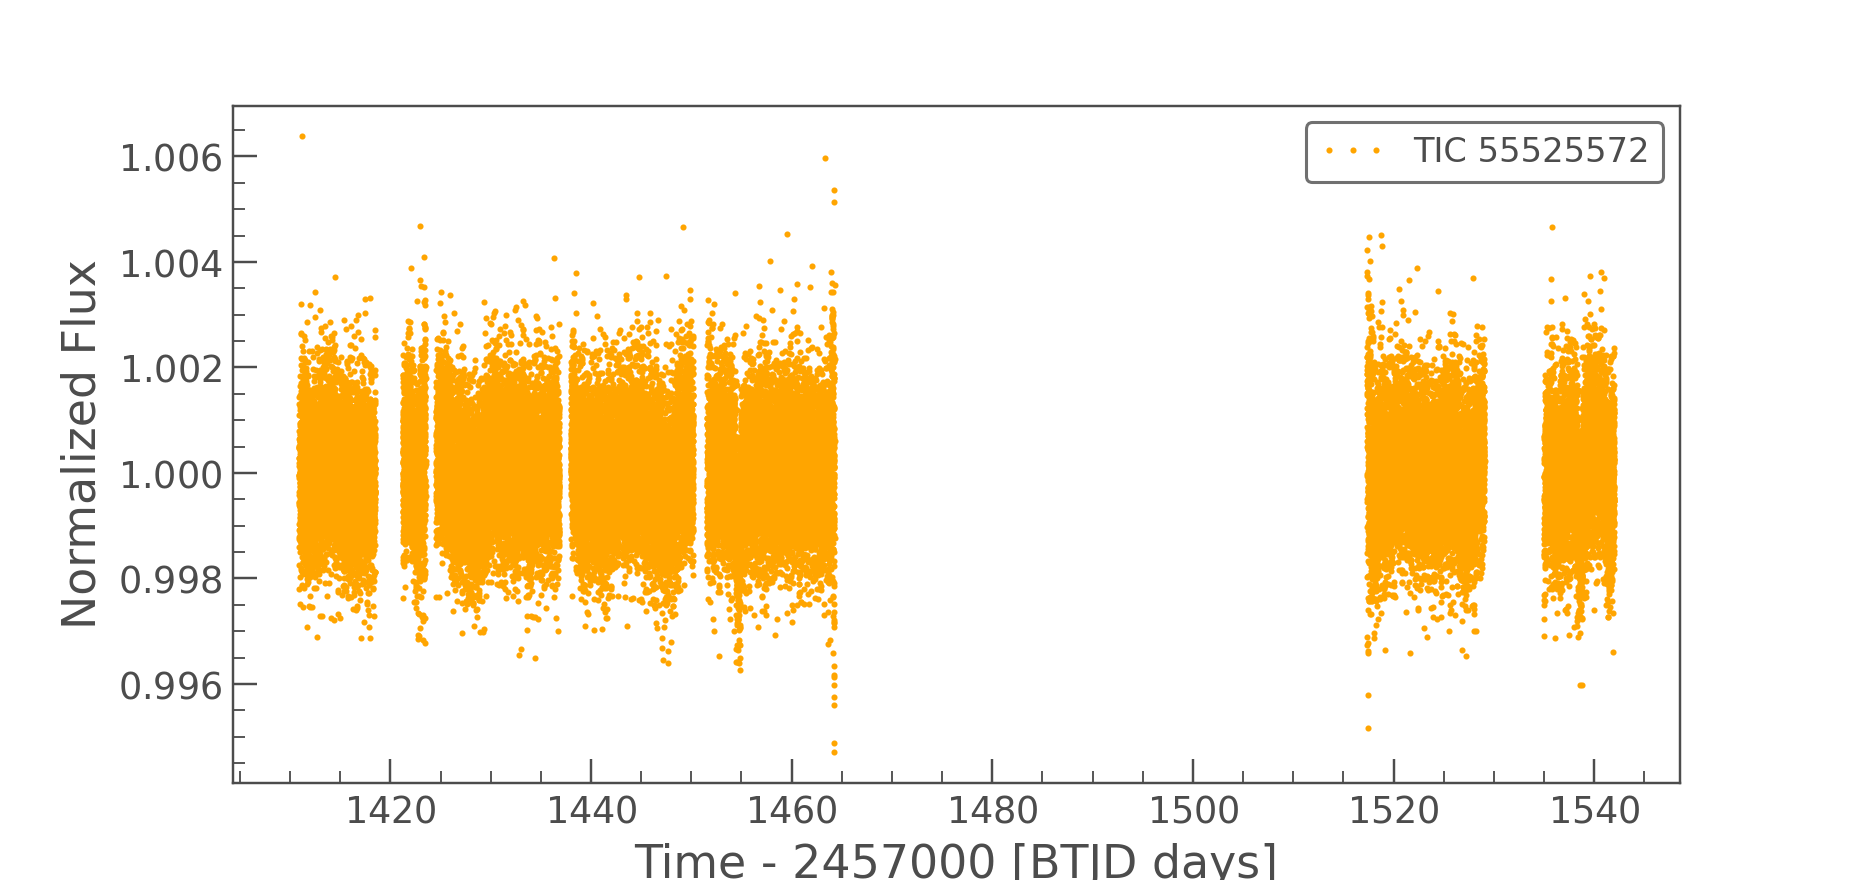

In [15]:
# and for multiple sectors in one line:

lk.search_lightcurve(TIC_2, author = 'SPOC', sector = [4,5,6,8]).download_all().stitch().plot(marker = '.', lw =0, color = 'orange')